### Goals
Classify whether a transaction is fraudulent or not


### Data Description 
| Features  | Description |
| ------------- | ------------- |
| step  | maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation) |
|type |CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER |
| amount | amount of the transaction in local currency  |
| nameOrig  | customer who started the transaction  | 
| oldbalanceOrg  |initial balance before the transaction |
| newbalanceOrig  | new balance after the transaction |
| nameDest  |customer who is the recipient of the transaction |
| oldbalanceDest | initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants)|
| newbalanceDest|new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants)|
| isFraud  | This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system  |
| isFlaggedFraud  | The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction|

In [1]:
#Common necessery libraries
#### Data Processing
import pandas as pd
import numpy as np

#### Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 03\DATASET\syntetic_fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe(include='O').T

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1784010646,3
nameDest,6362620,2722362,C1286084959,113


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


### Data Analyst & Visualization

### `isFraud`

In [7]:
df.stb.freq(['isFraud'])

,isFraud,count,percent,cumulative_count,cumulative_percent
0,0,6354407,99.870918,6354407,99.870918
1,1,8213,0.129082,6362620,100.000000


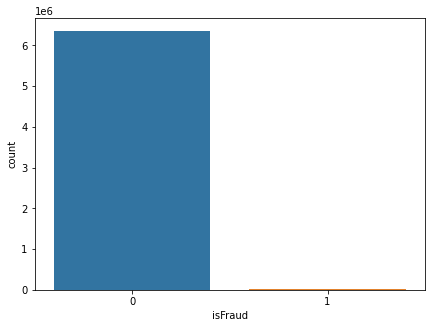

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(df['isFraud'])
plt.show()

From the countplot showed that the data imbalance since Non Fraud has higher frequentcy rather than fraudulent

### `isFlaggedFraud`

In [9]:
df.stb.freq(['isFlaggedFraud'])

,isFlaggedFraud,count,percent,cumulative_count,cumulative_percent
0,0,6362604,99.999749,6362604,99.999749
1,1,16,0.000251,6362620,100.000000


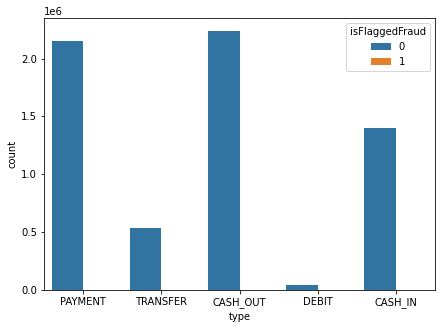

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['type'], hue=df['isFlaggedFraud'])
plt.show()

In [11]:
pd.crosstab(index=df['type'], columns=df['isFlaggedFraud'])

isFlaggedFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2237500,0
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,532893,16


The data showed that the simulation can flag only 16 transaction transfer as fraud

### `step`

In [14]:
df.stb.freq(['step'])

,step,count,percent,cumulative_count,cumulative_percent
0,19,51352,0.807089,51352,0.807089
1,18,49579,0.779223,100931,1.586312
2,187,49083,0.771427,150014,2.357739
3,235,47491,0.746406,197505,3.104146
4,307,46968,0.738186,244473,3.842332
...,...,...,...,...,...
738,54,4,0.000063,6362608,99.999811
739,29,4,0.000063,6362612,99.999874
740,28,4,0.000063,6362616,99.999937
741,662,2,0.000031,6362618,99.999969


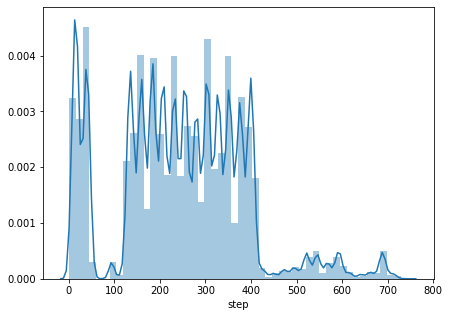

In [15]:
plt.figure(figsize=(7,5))
sns.distplot(df['step'])
plt.show()

### `amount`

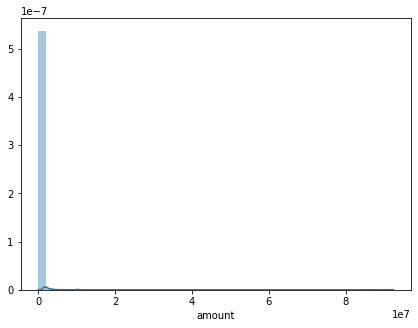

In [16]:
plt.figure(figsize=(7,5))
sns.distplot(df['amount'])
plt.show()

### `type`

In [17]:
df.stb.freq(['type'])

,type,count,percent,cumulative_count,cumulative_percent
0,CASH_OUT,2237500,35.166331,2237500,35.166331
1,PAYMENT,2151495,33.814608,4388995,68.980939
2,CASH_IN,1399284,21.992261,5788279,90.973200
3,TRANSFER,532909,8.375622,6321188,99.348822
4,DEBIT,41432,0.651178,6362620,100.000000


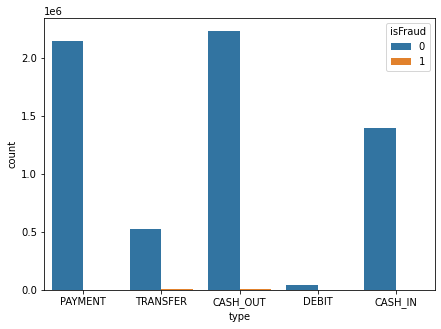

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['type'], hue=df['isFraud'])
plt.show()

In [24]:
pd.crosstab(index=df['type'], columns=df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


type of transaction that caused fraud are CASH_OUT and TRANSFER.\
So in next analyst, I will focused on this type of transaction

In [14]:
## df that just include CASH_OUT and TRANSFER
new_df = df[(df['type'] == 'CASH_OUT') | (df['type'] == 'TRANSFER')]

In [16]:
## df of fraud transaction
df_fraud = df[df['isFraud']==1]

### `amount`

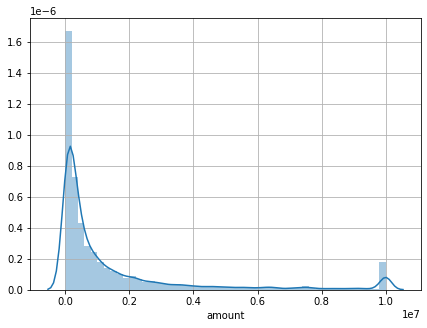

In [18]:
## Amount distribution of Fraud transaction
plt.figure(figsize=(7,5))
sns.distplot(df_fraud['amount'])
plt.grid()
plt.show()

The distribution of amount that has fraud transaction was **positive skewed**

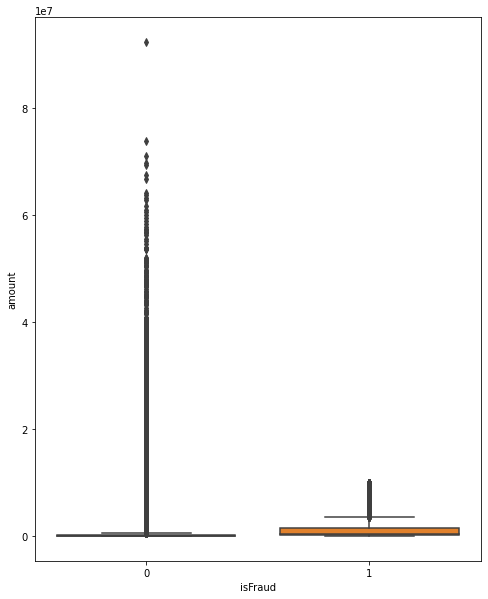

In [21]:
plt.figure(figsize=(8, 10))
sns.boxplot(x=df['isFraud'], y=df['amount'])
plt.show()

From the boxplot above, it showed that fraud transaction has greater amount rather that no fraud

### `oldbalanceOrg` & `oldbalanceDest`

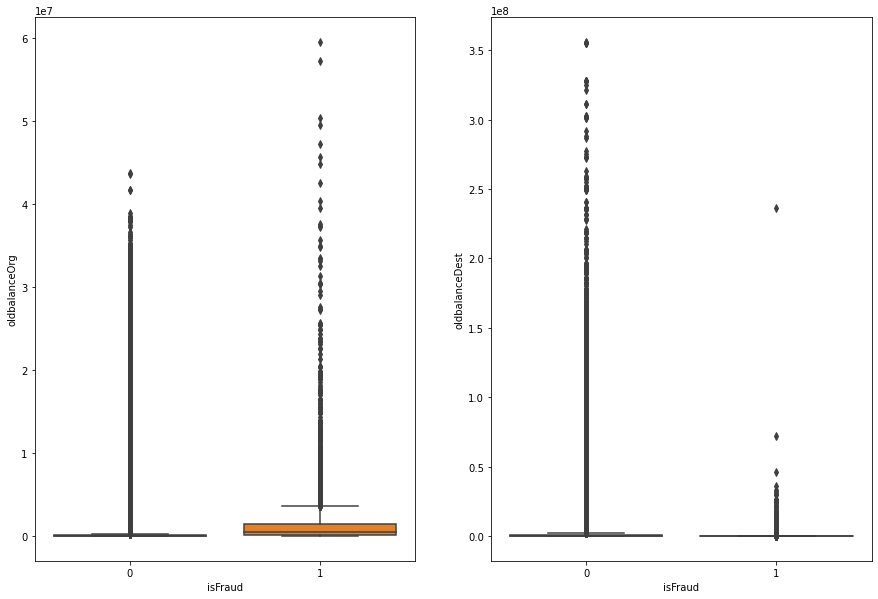

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x=df['isFraud'], y=df['oldbalanceOrg'])

plt.subplot(1,2,2)
sns.boxplot(x=df['isFraud'], y=df['oldbalanceDest'])

plt.show()

- The fraud transaction of oldbalanceOrg has higher payment rather than other
- while fraud transaction of oldbalanceDest has lower than no fraud

### `newbalanceOrig` & `newbalanceDest`

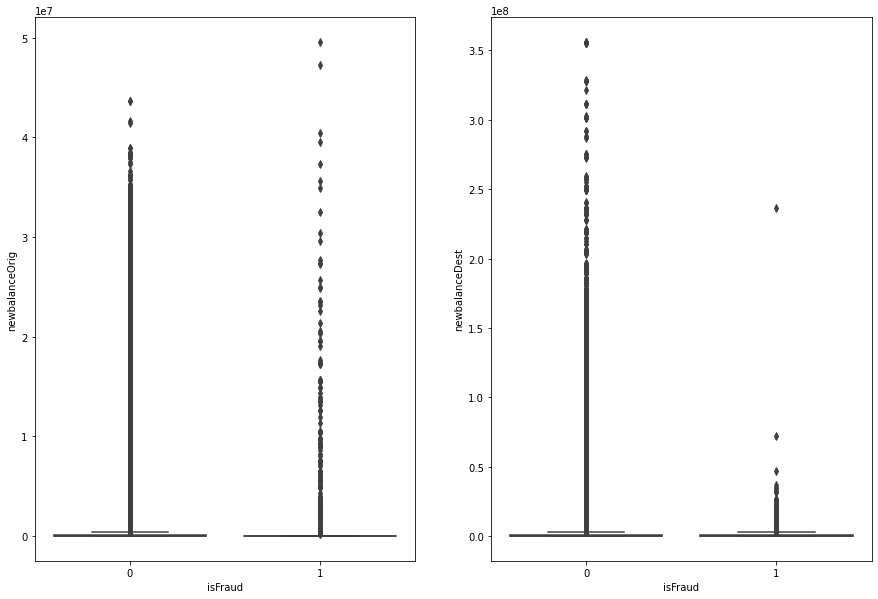

In [26]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x=df['isFraud'], y=df['newbalanceOrig'])

plt.subplot(1,2,2)
sns.boxplot(x=df['isFraud'], y=df['newbalanceDest'])

plt.show()